<a href="https://colab.research.google.com/github/pranavkantgaur/curves_and_surfaces/blob/master/curves_surfaces_monolithic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What are curves and surfaces?

In [2]:
!pip install bezier geomdl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
langchain 0.3.10 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.0 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have

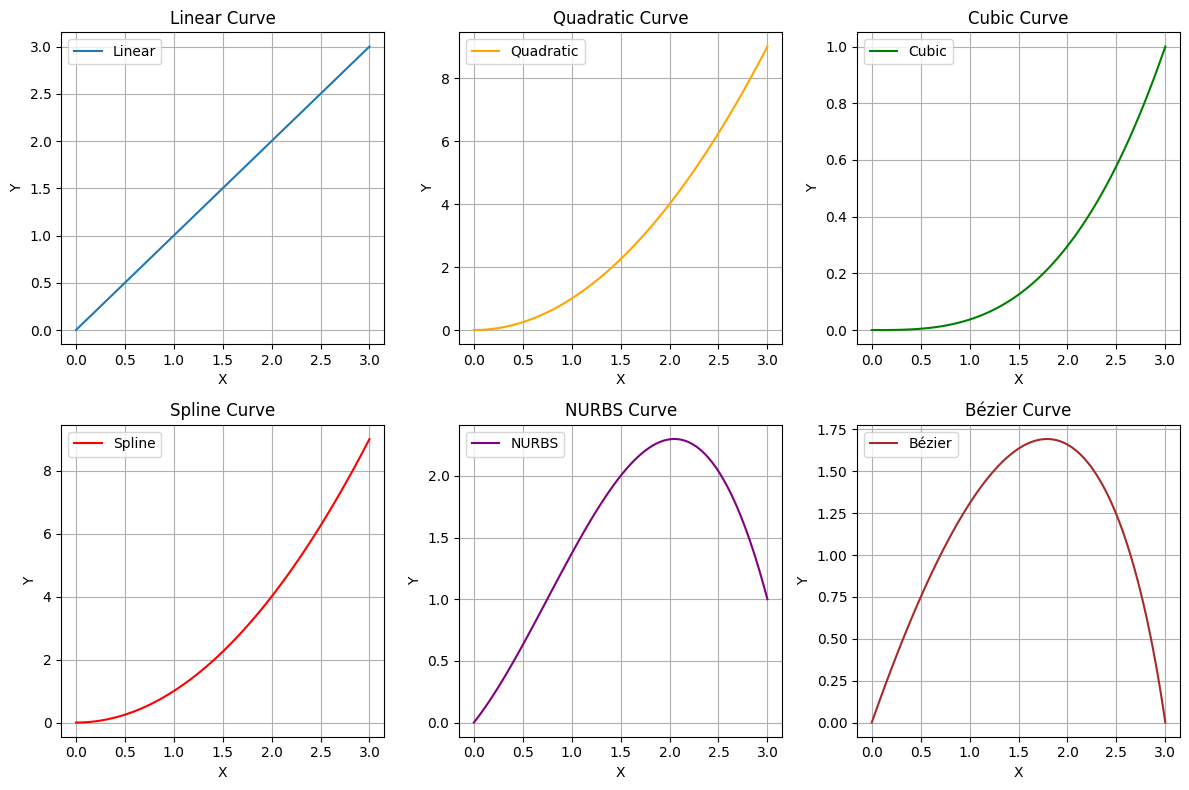

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import bezier  # Ensure you have the bezier library installed
from geomdl import BSpline, utilities

# Sample data points
x_data = np.array([0, 1, 2, 3])
y_data = np.array([0, 1, 4, 9])  # Quadratic function y = x^2

# Prepare a fine grid for plotting curves
x_fine = np.linspace(0, 3, 100)

# Linear Curve
y_linear = x_fine

# Quadratic Curve
y_quadratic = x_fine**2

# Cubic Curve
y_cubic = (x_fine**3) / 27  # Scale for better visualization

# Spline Curve
spline_tck = interpolate.splrep(x_data, y_data)
y_spline = interpolate.splev(x_fine, spline_tck)

# NURBS Curve (using geomdl)
nurbs_curve = BSpline.Curve()
nurbs_curve.degree = 3
nurbs_curve.ctrlpts = [[0, 0], [1, 1], [2, 4], [3, 1]]  # Control points for NURBS
nurbs_curve.knotvector = utilities.generate_knot_vector(nurbs_curve.degree, len(nurbs_curve.ctrlpts))
# Set evaluation delta: This is the crucial step to fix the error
nurbs_curve.delta = 0.01  # Adjust as needed for the desired number of points
nurbs_points = nurbs_curve.evalpts  # Access the evaluated points directly using evalpts
x_nurbs = [pt[0] for pt in nurbs_points] # Extract x-coordinates
y_nurbs = [pt[1] for pt in nurbs_points] # Extract y-coordinates

# Bézier Curve (using bezier library)
bezier_nodes = np.array([[0, 0], [1.5, 2.5], [2.5, 2], [3, 0]])  # Control points for Bézier curve
bezier_curve = bezier.Curve(bezier_nodes.T, degree=len(bezier_nodes) - 1)
s_vals = np.linspace(0.0, 1.0, num=100)
bezier_points = bezier_curve.evaluate_multi(s_vals)
x_bezier = bezier_points[0, :] # Extract x-coordinates
y_bezier = bezier_points[1, :] # Extract y-coordinates

# Plotting all curves
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x_fine, y_linear, label='Linear')
plt.title('Linear Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x_fine, y_quadratic, label='Quadratic', color='orange')
plt.title('Quadratic Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x_fine, y_cubic, label='Cubic', color='green')
plt.title('Cubic Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x_fine, y_spline, label='Spline', color='red')
plt.title('Spline Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(x_nurbs, y_nurbs, label='NURBS', color='purple')
plt.title('NURBS Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(x_bezier, y_bezier,label='Bézier', color='brown')
plt.title('Bézier Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## A running example
#### Developing ML model for nuclear cross-section estimation
* Scenario 1: The experimental dataset has cross-section values as a function of only energy. In this case, users can augment the dataset using various 1D curve generation methods.
* Scenario 2: The experimental dataset has cross-section values as a function of both energy and temperature. Here, users can augment the dataset using various 2D surface generation methods.


In [10]:
import numpy as np

# Sample data for cross_section_energy_only
energy_data_only = np.array([0.01, 0.1, 1, 10, 100])  # Energy in eV
cross_section_data_only = np.array([0.5, 1.5, 15, 10, 2])  # Cross-section in barns


In [11]:
import numpy as np

# Sample data for cross_section_energy_temperature
energy_data_temp = np.array([0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100])  # Energy in eV
temperature_data = np.array([300, 600, 300, 600, 300, 600, 300, 600, 300, 600])  # Temperature in K
cross_section_data_temp = np.array([0.5, 0.55, 1.5, 1.6, 15, 16, 10, 11, 2, 2.2])  # Cross-section in barns


In [80]:
!pip install bezier==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
  Attempting uninstall: bezier
    Found existing installation: bezier 2024.6.20
    Uninstalling bezier-2024.6.20:
      Successfully uninstalled bezier-2024.6.20


In [1]:
from bezier.surface import Surface # Surface is in a submodule of bezier

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import argparse

# Function to perform 1D data augmentation using different curve generation methods
def augment_data_1d(energy_data, cross_section_data, method='spline'):
    energy_fine = np.linspace(min(energy_data), max(energy_data), num=100)

    if method == 'linear':
        augmented_cross_sections = np.interp(energy_fine, energy_data, cross_section_data)
    elif method == 'spline':
        # Sort energy_data and cross_section_data based on energy_data
        sorted_indices = np.argsort(energy_data)
        energy_data_sorted = energy_data[sorted_indices]
        cross_section_data_sorted = cross_section_data[sorted_indices]

        # Remove duplicate energy values and corresponding cross-sections
        energy_data_unique, unique_indices = np.unique(energy_data_sorted, return_index=True)
        cross_section_data_unique = cross_section_data_sorted[unique_indices]

        # Perform spline interpolation with unique and sorted data
        spline_tck = interpolate.splrep(energy_data_unique, cross_section_data_unique)
        augmented_cross_sections = interpolate.splev(energy_fine, spline_tck)
    elif method == 'polynomial':
        coeffs = np.polyfit(energy_data, cross_section_data, deg=3)
        augmented_cross_sections = np.polyval(coeffs, energy_fine)


    elif method == 'nurbs':
        # Using NURBS for augmentation
        from geomdl import BSpline, utilities

        nurbs_curve = BSpline.Curve()
        nurbs_curve.degree = 3
        nurbs_curve.ctrlpts = np.column_stack((energy_data, cross_section_data)).tolist()
        # Generate a valid knot vector using geomdl's utility function
        nurbs_curve.knotvector = utilities.generate_knot_vector(nurbs_curve.degree, len(nurbs_curve.ctrlpts))
        # Set evaluation delta: This is the crucial step to fix the error
        nurbs_curve.delta = 0.01  # Adjust as needed for the desired number of points
        nurbs_points = nurbs_curve.evalpts  # Access the evaluated points directly using evalpts
        augmented_cross_sections = [pt[1] for pt in nurbs_points]  # Extract y-coordinates (cross-sections)
        energy_fine = [pt[0] for pt in nurbs_points]  # Extract x-coordinates (energy)
    elif method == 'bezier':
       # Using Bézier curves for augmentation
        nodes = np.array([energy_data, cross_section_data]).T  # Control points for Bézier curve
        curve = bezier.Curve(nodes.T, degree=len(nodes) - 1)

        # Evaluate the curve at evenly spaced points in [0, 1]
        # Use evaluate_multi instead of evaluate_list
        s_vals = np.linspace(0.0, 1.0, num=100)
        bezier_points = curve.evaluate_multi(s_vals)

        augmented_cross_sections = bezier_points[1, :]  # Extract y-coordinates (cross-sections)
        energy_fine = bezier_points[0, :]  # Extract x-coordinates (energy)

    else:
        raise ValueError("Unsupported curve generation method.")

    # Adding noise for augmentation
    noise = np.random.normal(0, 0.1 * np.abs(augmented_cross_sections))  # 10% noise # Use np.abs() to handle array or list inputs
    augmented_cross_sections += noise # augmented_cross_sections is likely a list, so using '+=' might cause issues
    augmented_cross_sections = np.array(augmented_cross_sections) + noise  # Convert to array and add noise

    return energy_fine, augmented_cross_sections

# Function to perform 2D data augmentation using surface generation methods
def augment_data_2d(energy_data, temperature_data, cross_section_data, method='linear'):
    energy_fine = np.linspace(min(energy_data), max(energy_data), num=100)
    temperature_fine = np.linspace(min(temperature_data), max(temperature_data), num=100)

    # Create a meshgrid for 2D interpolation
    E_grid, T_grid = np.meshgrid(energy_fine, temperature_fine)

    if method == 'linear':
        # Linear interpolation on a grid
        Z = interpolate.griddata((energy_data, temperature_data), cross_section_data,
                                 (E_grid.ravel(), T_grid.ravel()), method='linear')
    elif method == 'cubic':
        # Cubic interpolation on a grid
        Z = interpolate.griddata((energy_data, temperature_data), cross_section_data,
                                 (E_grid.ravel(), T_grid.ravel()), method='cubic')
    elif method == 'nurbs':
          # Using NURBS for surface generation in 2D
          from geomdl import BSpline

          nurbs_surface = BSpline.Surface()

          # Set the degrees in u and v directions (reduce degree_v if needed)
          nurbs_surface.degree_u = 3  # Example degree in the u direction
          nurbs_surface.degree_v = 1  # Reduced degree to accommodate fewer unique temperature values

          # Ensure enough control points in both u and v directions
          num_ctrl_pts_u = max(len(np.unique(energy_data)), nurbs_surface.degree_u + 1)
          num_ctrl_pts_v = max(len(np.unique(temperature_data)), nurbs_surface.degree_v + 1)

          # Reshape or interpolate to get enough control points if needed.
          # Here, we increase the number of unique temperature values if necessary
          if num_ctrl_pts_v < nurbs_surface.degree_v + 1:
              temperature_fine = np.linspace(min(temperature_data), max(temperature_data), num=nurbs_surface.degree_v + 1)
              # Interpolate cross-section data to match the new temperature values (adjust as needed)
              interp_func = interpolate.interp1d(temperature_data, cross_section_data, kind='linear', fill_value="extrapolate")
              cross_section_data = interp_func(temperature_fine)
              temperature_data = temperature_fine

          # Control points need to be reshaped properly for a surface.
          control_points = np.array([[e, t, cs] for e, t, cs in zip(energy_data, temperature_data, cross_section_data)])

          nurbs_surface.set_ctrlpts(control_points.tolist(), len(np.unique(temperature_data)), len(np.unique(energy_data)))

          # Generate the surface points based on the control points.
          Z_points = nurbs_surface.evaluate(num_pts=100).pts

          E_grid_flattened = Z_points[:, 0]
          T_grid_flattened = Z_points[:, 1]

          Z = Z_points[:, 2].reshape(len(temperature_fine), len(energy_fine))

    elif method == 'bezier':
        # Using Bézier surfaces for augmentation (simplified example)

        # Adjust control points to create a 2D grid of points
        num_points_u = 10  # Number of points in the u direction (energy)
        num_points_v = 10  # Number of points in the v direction (temperature)

        # Create a grid of u and v values
        u_vals = np.linspace(0.0, 1.0, num_points_u)
        v_vals = np.linspace(0.0, 1.0, num_points_v)

        # Create a grid of control points using interpolation
        energy_grid = np.linspace(min(energy_data), max(energy_data), num_points_u)
        temp_grid = np.linspace(min(temperature_data), max(temperature_data), num_points_v)

        # Interpolate to get cross-section values on the grid
        # griddata requires unique data points, so remove duplicates if any
        energy_data_unique, unique_indices = np.unique(energy_data, return_index=True)
        temp_data_unique = temperature_data[unique_indices]
        cross_section_data_unique = cross_section_data[unique_indices]

        cross_section_grid = interpolate.griddata(
            (energy_data_unique, temp_data_unique),
            cross_section_data_unique,
            (energy_grid[np.newaxis, :], temp_grid[:, np.newaxis]),
            method='linear'  # Choose interpolation method
        )

        # Stack the grids to form the control points
        control_points_2d = np.stack([
            energy_grid[np.newaxis, :].repeat(num_points_v, axis=0),  # x-coordinates (energy)
            temp_grid[:, np.newaxis].repeat(num_points_u, axis=1),  # y-coordinates (temperature)
            cross_section_grid  # z-coordinates (cross-section)
        ])

        # Reshape control points to be 2D before creating the surface:
        control_points_2d = control_points_2d.reshape(-1, 3)  # Reshape to (num_points, 3)

        # Create a Bézier surface
        bezier_surface_curve = Surface(control_points_2d)

        # Evaluate the surface at the grid of u and v values
        Z = bezier_surface_curve.evaluate_cartesian(u_vals, v_vals)

        # Extract energy and temperature grids from the evaluated points
        E_grid = Z[0, :, :]
        T_grid = Z[1, :, :]
        Z = Z[2, :, :]  # Cross-section values

    else:
        raise ValueError("Unsupported surface generation method.")

    # Reshape back to grid shape
    Z = Z.reshape(E_grid.shape)

    return E_grid, T_grid, Z

# Load experimental cross-section dataset (for both scenarios)
def load_dataset(file_path):
    data = pd.read_csv(file_path)  # Assuming CSV format with appropriate columns
    return data

# Main function to run the training and evaluation process for both scenarios
def main(scenario):
    if scenario == '1':
        # Use sample dataset for Scenario 1 (Energy only)
        energy_data = np.linspace(0.01, 100, num=100)
        cross_section_data = (20 / (energy_data + np.random.normal(0, 1, size=energy_data.shape))).clip(min=0.1)

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            energy_data.reshape(-1, 1), cross_section_data, test_size=0.2, random_state=42)

        # Choose curve generation method for augmentation
        curve_method = input("Select curve generation method (linear/spline/polynomial/nurbs/bezier): ")

        # Data augmentation on-the-fly during training
        augmented_energy, augmented_cross_sections = augment_data_1d(X_train.flatten(), y_train,
                                                                     method=curve_method)

        # Combine original and augmented data for training
        X_combined = np.concatenate((X_train.flatten(), augmented_energy))
        y_combined = np.concatenate((y_train, augmented_cross_sections))

        # Train a neural network model
        model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
        model.fit(X_combined.reshape(-1, 1), y_combined)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model performance
        mse = mean_squared_error(y_test, y_pred)

        print(f"Mean Squared Error on Test Set: {mse:.4f}")

        # Plotting results for visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, color='blue', label='Predicted Data', alpha=0.7)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

        plt.title('Neutron Cross-Section Prediction (Energy Only)')
        plt.xlabel('Actual Cross Section (barns)')
        plt.ylabel('Predicted Cross Section (barns)')
        plt.legend()
        plt.grid()
        plt.show()

    elif scenario == '2':

        # Sample data for energy and temperature dependence of cross-section
        energy_data = np.linspace(0.01, 100, num=1000)
        temperature_data = np.random.choice([300, 600], size=1000)
        cross_section_data = (
            (10 / (energy_data + np.random.normal(0, 1, size=energy_data.shape))) +
            (0.1 * (temperature_data == 600)) +
            np.random.normal(0, 0.5, size=energy_data.shape)
        )
        # Split into training and testing sets for Scenario 2.
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
            np.column_stack((energy_data, temperature_data)), cross_section_data,
            test_size=0.2, random_state=42)

        # Data augmentation using surface generation methods.
        surface_method = input("Select surface generation method (linear/cubic/nurbs/bezier): ")

        E_grid_augmented, T_grid_augmented, Z_augmented_cross_sections = augment_data_2d(
            energy_data[:], temperature_data[:], cross_section_data[:],
            method=surface_method)

        # Train a neural network model for Scenario 2 using the original training data.
        model_temp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
        model_temp.fit(X_train_temp, y_train_temp)

        # Make predictions on the test set for temperature scenario.
        y_pred_temp = model_temp.predict(X_test_temp)

        # Evaluate the model performance.
        mse_temp = mean_squared_error(y_test_temp, y_pred_temp)

        print(f"Mean Squared Error on Test Set (Energy & Temperature): {mse_temp:.4f}")

        # Plotting results for visualization of predictions vs actual values.
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test_temp,y_pred_temp,color='blue',label='Predicted Data', alpha=0.7)
        plt.plot([min(y_test_temp), max(y_test_temp)], [min(y_test_temp), max(y_test_temp)], color='red', linestyle='--', label='Perfect Prediction')

        plt.title('Neutron Cross-Section Prediction (Energy & Temperature)')
        plt.xlabel('Actual Cross Section (barns)')
        plt.ylabel('Predicted Cross Section (barns)')
        plt.legend()
        plt.grid()
        plt.show()

Select curve generation method (linear/spline/polynomial/nurbs/bezier): bezier


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error on Test Set: 25.1392


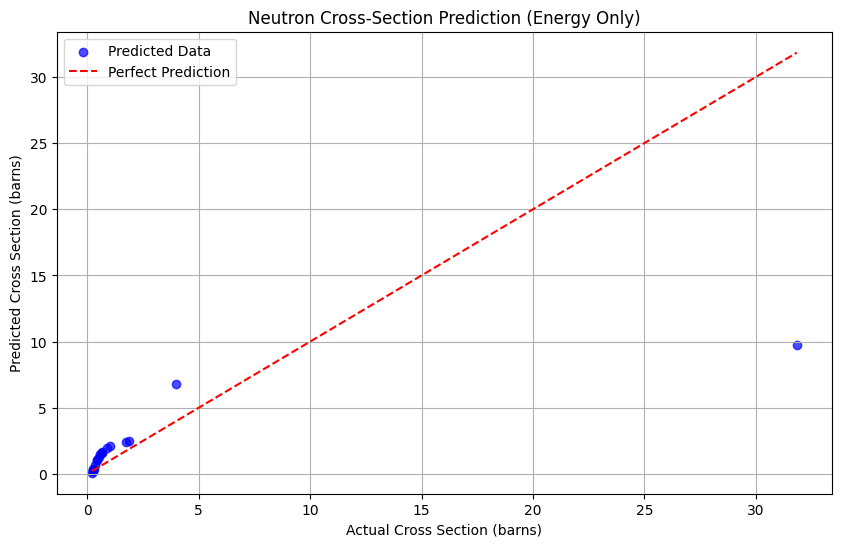

In [56]:
main('1')

In [7]:
main('2')

Select surface generation method (linear/cubic/nurbs/bezier): bezier


ValueError: (100, 'not a triangular number')

## Lets dig deeper into the algorithms

### Bezier interpolation

In [ ]:
## Pseudocode

In [ ]:
## Failed test-cases

### Spline interpolation

In [ ]:
## Pseudocode

In [ ]:
## Failed test-cases

### B-spline interpolation

In [ ]:
## Pseudocode

In [ ]:
## Failed test-cases

### NURBS interpolation

In [ ]:
## Pseudocode

In [ ]:
## Failed test-cases

## Reflections

### Which one to use when?